# Universal Rabbit equations

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

* [Equation for the model]:
* $\dot{N}_i = \delta_{i,0} \left(1-N_0\right)N_0 + \sum_j A_{i,j} N_i N_j - \Gamma_i N_i$, where $N_i$ is the number of individual of species $i$,  $\Gamma_i$ is the death rate of species $i$, $A$ is the feeding matrix.

In [188]:
def init_params(n_species, p_interact):
    A = np.zeros((n_species, n_species))
    gamma = np.zeros(n_species)

    mask = np.random.rand(n_species, n_species) < p_interact

    # all eating bunnies
    A[0, 1:] = np.ones(n_species-1)
    A[1:, 0] = - np.ones(n_species-1)

    # relations between predators
    for i in range(1, n_species):
        gamma[i] = np.random.rand()
        for j in range(i+1, n_species):
            if mask[i, j]:
                A[i, j] = np.random.rand()
                A[j, i] = -1

    return A, gamma

def derivative(N, t, A, gamma):
    dotN = np.zeros(N.shape)
    dotN[0] = (1 - N[0]) * N[0]
    dotN += (A.T @ N) * N
    dotN -= gamma * N
    return dotN

In [213]:
seed = 42
np.random.seed(seed)

Nt = 1000
t_max = 90. # days
p_interact = 1.0
t = np.linspace(0.,t_max, Nt)
n_predators = 40
N0 = np.ones(n_predators + 1)
A, gamma = init_params(n_predators + 1, p_interact)

res = integrate.odeint(derivative, N0, t, args = (A, gamma))
N = res.T

In [214]:
print(A, gamma)

[[ 0.          1.          1.         ...  1.          1.
   1.        ]
 [-1.          0.          0.64097208 ...  0.98367893  0.2391801
   0.14224937]
 [-1.         -1.          0.         ...  0.48785404  0.1097362
   0.54795949]
 ...
 [-1.         -1.         -1.         ...  0.          0.57727903
   0.86557715]
 [-1.         -1.         -1.         ... -1.          0.
   0.40758421]
 [-1.         -1.         -1.         ... -1.         -1.
   0.        ]] [0.         0.9756102  0.12138494 0.45437733 0.07125673 0.65647861
 0.21351137 0.95807348 0.05855093 0.51807877 0.75939826 0.11409578
 0.20136378 0.79285442 0.41776098 0.33520805 0.27927609 0.11072059
 0.46876797 0.59897851 0.1042248  0.28068322 0.87422252 0.25760722
 0.59366079 0.04373907 0.85756234 0.15445975 0.68827424 0.45852301
 0.38948189 0.2593349  0.44404375 0.20131211 0.72214324 0.27576757
 0.48340744 0.20322309 0.49232548 0.98073934 0.82751892]


In [215]:
N.shape

(41, 1000)

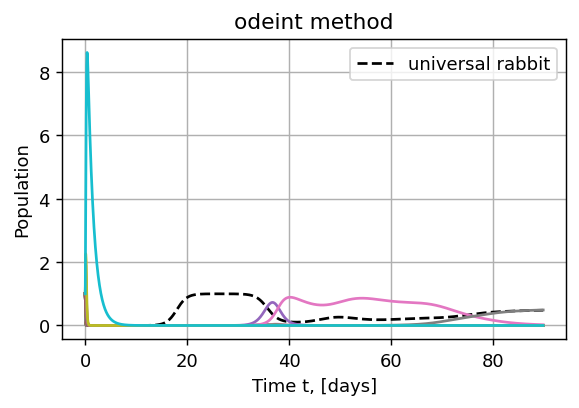

In [216]:
t_plot = 90

fig, ax = plt.subplots(1,1, figsize = (5,3), dpi=130)
plt.grid()
plt.title("odeint method")
plt.plot(t[t<t_plot], N[0,t<t_plot].T, '--', label = 'universal rabbit', color = 'k')
plt.plot(t[t<t_plot], N[1:,t<t_plot].T)
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()